In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv('data_ml.csv', index_col=0)
data_raw.reset_index(inplace=True)
del data_raw['index']

In [3]:
idx_date = data_raw.index[(data_raw['date'] > '1999-12-31') & (data_raw['date'] < '2019-01-01')].to_list()

In [4]:
data_ml = data_raw.iloc[idx_date]

In [5]:
data_ml.iloc[0:6,0:6]

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover
0,13,2006-12-31,0.25,0.33,0.27,0.22
1,13,2007-01-31,0.25,0.32,0.28,0.22
2,13,2007-02-28,0.26,0.30,0.30,0.22
3,17,2015-03-31,0.73,0.64,0.70,0.40
4,17,2015-04-30,0.72,0.62,0.66,0.40
5,17,2015-05-31,0.71,0.63,0.64,0.40


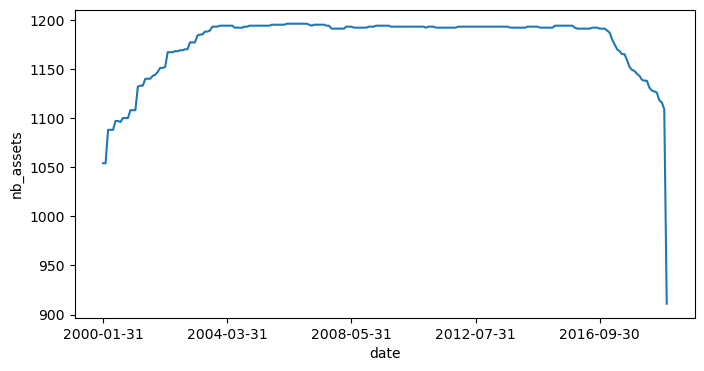

In [6]:
pd.Series(data_ml.groupby('date').size()).plot(figsize=(8, 4))
plt.ylabel('nb_assets')
plt.show()

In [7]:
features = list(data_ml.iloc[:,3:95].columns)
features

['Advt_3M_Usd',
 'Advt_6M_Usd',
 'Asset_Turnover',
 'Bb_Yld',
 'Bv',
 'Capex_Ps_Cf',
 'Capex_Sales',
 'Cash_Div_Cf',
 'Cash_Per_Share',
 'Cf_Sales',
 'Debtequity',
 'Div_Yld',
 'Dps',
 'Ebit_Bv',
 'Ebit_Noa',
 'Ebit_Oa',
 'Ebit_Ta',
 'Ebitda_Margin',
 'Eps',
 'Eps_Basic',
 'Eps_Basic_Gr',
 'Eps_Contin_Oper',
 'Eps_Dil',
 'Ev',
 'Ev_Ebitda',
 'Fa_Ci',
 'Fcf',
 'Fcf_Bv',
 'Fcf_Ce',
 'Fcf_Margin',
 'Fcf_Noa',
 'Fcf_Oa',
 'Fcf_Ta',
 'Fcf_Tbv',
 'Fcf_Toa',
 'Fcf_Yld',
 'Free_Ps_Cf',
 'Int_Rev',
 'Interest_Expense',
 'Mkt_Cap_12M_Usd',
 'Mkt_Cap_3M_Usd',
 'Mkt_Cap_6M_Usd',
 'Mom_11M_Usd',
 'Mom_5M_Usd',
 'Mom_Sharp_11M_Usd',
 'Mom_Sharp_5M_Usd',
 'Nd_Ebitda',
 'Net_Debt',
 'Net_Debt_Cf',
 'Net_Margin',
 'Netdebtyield',
 'Ni',
 'Ni_Avail_Margin',
 'Ni_Oa',
 'Ni_Toa',
 'Noa',
 'Oa',
 'Ocf',
 'Ocf_Bv',
 'Ocf_Ce',
 'Ocf_Margin',
 'Ocf_Noa',
 'Ocf_Oa',
 'Ocf_Ta',
 'Ocf_Tbv',
 'Ocf_Toa',
 'Op_Margin',
 'Op_Prt_Margin',
 'Oper_Ps_Net_Cf',
 'Pb',
 'Pe',
 'Ptx_Mgn',
 'Recurring_Earning_Total_Assets',

Text(0, 0.5, 'count')

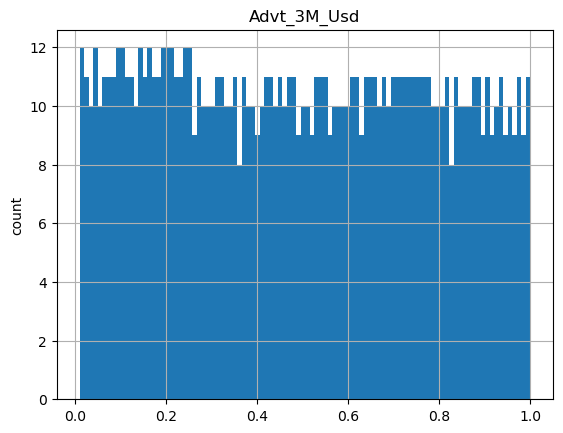

In [8]:
col_feat_Div_Yld = data_ml.columns.get_loc('Advt_3M_Usd')
is_custom_date = data_ml['date'] == '2000-02-29'
data_ml[is_custom_date].iloc[:,[col_feat_Div_Yld]].hist(bins=100)
plt.ylabel('count')

In [9]:
df_median = []
df = []
df_median = data_ml[['date', 'R1M_Usd', 'R12M_Usd']].groupby(['date']).median()
df_median.rename(columns={'R1M_Usd': 'R1M_Usd_median', 'R12M_Usd': 'R12M_Usd_median'}, inplace=True)
df = pd.merge(data_ml, df_median, how='left', on=['date'])
data_ml['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1, 0)
data_ml['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1, 0)

/var/folders/jz/_62zm7jn3y754w_n7gcp4v3m0000gn/T/ipykernel_13793/1738956670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1, 0)
/var/folders/jz/_62zm7jn3y754w_n7gcp4v3m0000gn/T/ipykernel_13793/1738956670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1, 0)


In [10]:
separation_date = '2014-01-15'
idx_train = data_ml.index[(data_ml['date'] < separation_date)].to_list()
idx_test = data_ml.index[(data_ml['date'] >= separation_date)].to_list()

In [11]:
stock_ids_short = []
stock_days = []
stock_ids = data_ml['stock_id'].unique()
stock_days = data_ml[['date', 'stock_id']].groupby(['stock_id']).count().reset_index()
stock_ids_short = stock_days.loc[stock_days['date'] == (stock_days['date'].max())]
stock_ids_short = stock_ids_short['stock_id'].unique()
is_stock_ids_short = data_ml['stock_id'].isin(stock_ids_short)
returns = data_ml[is_stock_ids_short].pivot(index='date', columns='stock_id', values='R1M_Usd')

In [12]:
returns.head()

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
